In [1]:
#Apply Machine learning on features in order to predict an adopted user and relationship between features .
#import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
%matplotlib inline

In [3]:
users = pd.read_csv('takehome_users.csv', encoding='latin-1')
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [4]:
eng = pd.read_csv('takehome_user_engagement.csv')
eng.head(5)

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [5]:
visits = eng["user_id"].value_counts()
adopted = visits[visits >= 3]

In [6]:
adopted

3623     606
906      600
1811     593
7590     590
8068     585
9402     581
4022     580
3269     566
9312     547
7210     545
8029     541
2474     538
2658     526
8280     521
69       521
5297     520
4019     519
9083     517
2519     511
4263     509
3226     502
10599    501
6312     500
10953    499
8426     496
2316     496
603      489
2078     488
8768     487
445      487
        ... 
1742       3
10058      3
788        3
5730       3
9232       3
11250      3
8802       3
11213      3
455        3
10820      3
3220       3
2624       3
9959       3
3318       3
277        3
2714       3
6414       3
6569       3
3323       3
5145       3
9284       3
11851      3
6808       3
9318       3
8047       3
6090       3
8464       3
5528       3
6900       3
7310       3
Name: user_id, Length: 2248, dtype: int64

In [7]:
for index, val in adopted.iteritems(): 
    users.loc[users['object_id'] == index, 'adopted_user'] = 1

In [8]:
users.loc[users['object_id'] == 2]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0


In [9]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,NaN
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,NaN
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,NaN
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,NaN


In [10]:
users=users.fillna(0)
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0


In [11]:
users.adopted_user.value_counts(True)

0.0    0.812667
1.0    0.187333
Name: adopted_user, dtype: float64

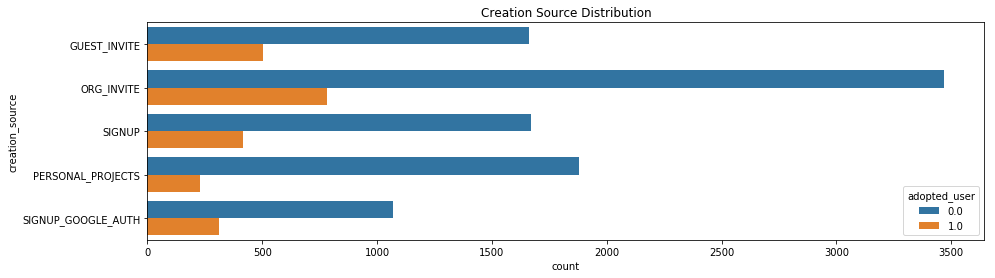

In [12]:
# Creation Source Distribution
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="creation_source", hue='adopted_user', data=users).set_title('Creation Source Distribution');

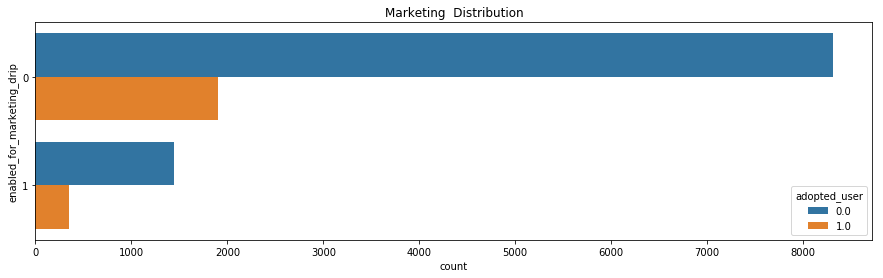

In [13]:
# Marketing Distribution
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="enabled_for_marketing_drip", hue='adopted_user', data=users).set_title('Marketing  Distribution');

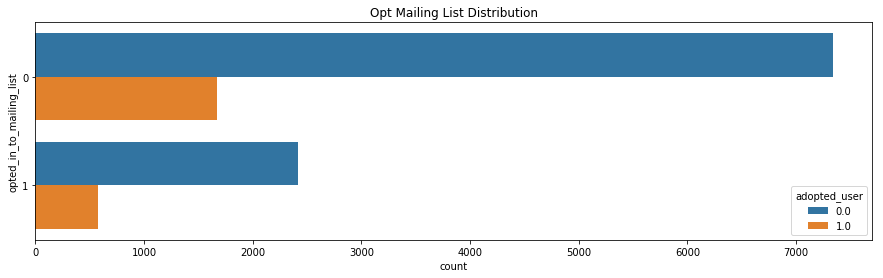

In [14]:
# Opt Mailing List Distribution
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="opted_in_to_mailing_list", hue='adopted_user', data=users).set_title('Opt Mailing List Distribution');

In [15]:
# Creation Time Distribution
users['creation_time'] = pd.to_datetime(users.creation_time)

In [16]:
users['year'] = users['creation_time'].dt.year
users['month'] = users['creation_time'].dt.month
users['day'] = users['creation_time'].dt.day

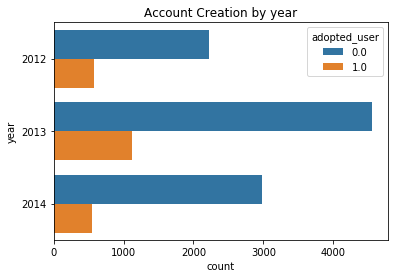

In [17]:
# Account Creation by month
sns.countplot(y="year", hue='adopted_user', data=users).set_title('Account Creation by year');

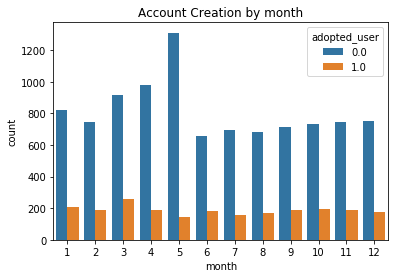

In [18]:
sns.countplot(x='month', hue='adopted_user',data=users).set_title('Account Creation by month');

In [19]:
users.email = users.email.apply(lambda x: x.split('@')[1].split('.')[0])

In [20]:
users

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,year,month,day
0,1,2014-04-22 03:53:30,Clausen August,yahoo,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,0.0,2014,4,22
1,2,2013-11-15 03:45:04,Poole Matthew,gustr,ORG_INVITE,1.396238e+09,0,0,1,316.0,1.0,2013,11,15
2,3,2013-03-19 23:14:52,Bottrill Mitchell,gustr,ORG_INVITE,1.363735e+09,0,0,94,1525.0,0.0,2013,3,19
3,4,2013-05-21 08:09:28,Clausen Nicklas,yahoo,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,0.0,2013,5,21
4,5,2013-01-17 10:14:20,Raw Grace,yahoo,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,0.0,2013,1,17
5,6,2013-12-17 03:37:06,Cunha Eduardo,yahoo,GUEST_INVITE,1.387424e+09,0,0,197,11241.0,0.0,2013,12,17
6,7,2012-12-16 13:24:32,Sewell Tyler,jourrapide,SIGNUP,1.356010e+09,0,1,37,0.0,0.0,2012,12,16
7,8,2013-07-31 05:34:02,Hamilton Danielle,yahoo,PERSONAL_PROJECTS,0.000000e+00,1,1,74,0.0,0.0,2013,7,31
8,9,2013-11-05 04:04:24,Amsel Paul,hotmail,PERSONAL_PROJECTS,0.000000e+00,0,0,302,0.0,0.0,2013,11,5
9,10,2013-01-16 22:08:03,Santos Carla,gustr,ORG_INVITE,1.401833e+09,1,1,318,4143.0,1.0,2013,1,16


In [21]:
users.email.value_counts().head(10)

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
gustr         1179
hotmail       1165
mumdc            2
qgjbc            2
luque            2
xvnbr            2
Name: email, dtype: int64

In [23]:
main_domain = ['gmail', 'yahoo', 'jourrapide', 'cuvox', 'gustr', 'hotmail']
users.email[~users.email.isin(main_domain)] = 'others'


C:\DalbirData\New folder\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [24]:
users.email.value_counts().head(10)

gmail         3562
yahoo         2447
jourrapide    1259
cuvox         1202
others        1186
gustr         1179
hotmail       1165
Name: email, dtype: int64

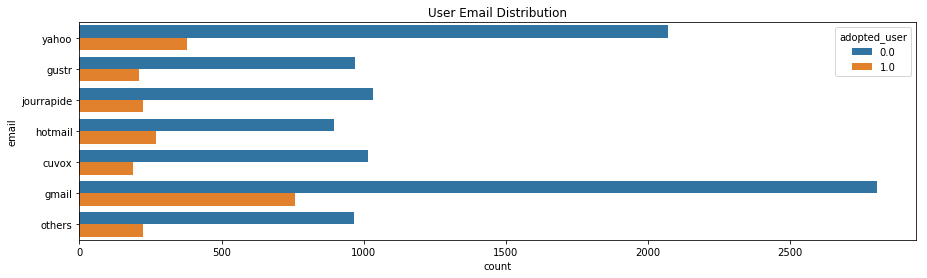

In [25]:
# User Email Distribution
f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="email", hue='adopted_user', data=users).set_title('User Email Distribution');